In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d eldarsultanow/ml-bsd-dataset-integers

 99% 272M/274M [00:16<00:00, 19.5MB/s]
100% 274M/274M [00:16<00:00, 17.3MB/s]


In [ ]:
! unzip ml-bsd-dataset-integers.zip

Archive:  ml-bsd-dataset-integers.zip
  inflating: rank-vs-ap-integers.csv  


In [ ]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import sympy
from scipy.interpolate import interp1d
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sympy import prime, isprime, primerange
import random
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score


In [ ]:
df = pd.read_csv("rank-vs-ap-integers.csv", index_col=False, header=None)
new_columns = ['rank', 'con', 'root'] + [f'ap_{i}' for i in range(1, 1230)]

df.columns = new_columns

df_2 = df.loc[df['rank'] == 2].sample(n=13616, random_state=1)
df_3 = df.loc[df['rank'] == 3]
df_3_2 = pd.concat([df_3, df_2])
df_1 = df.loc[df['rank'] == 1].sample(n=42290, random_state=1)
df_0 = df.loc[df['rank'] == 0]
df_0_1 = pd.concat([df_1, df_0])

df_sub = pd.concat([df_0_1, df_3_2])
df_sub['rank'].value_counts()

1    42290
0    42290
3    13616
2    13616
Name: rank, dtype: int64

In [ ]:
df_sub = df_sub[~df_sub['rank'].isin([4,5,6])]
feature_col = [col for col in df.columns if col.startswith('ap_')]
X = df_sub[ feature_col]
y = df_sub['rank']
print(X)

        ap_1  ap_2  ap_3  ap_4  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ...  \
76492     -1     1     0     4    -4     5    -2     2    -8     -6  ...   
62660     -1     0     0     2     6     2    -1     4     3     -6  ...   
26131      0     0     4     1     0     3     2     0     7      5  ...   
74087     -1    -2     2     2     4     3     0     5     8      0  ...   
8084       2     1     2    -1     4    -6     5     4    -8      3  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
117731    -1     2     1     4    -2     5     0    -3     2      9  ...   
133602    -1     1    -1    -4     4     4     4    -3    -3      4  ...   
126113    -1    -1    -1    -4    -4    -2    -2     2     8      3  ...   
113982    -1     2     0     1    -4     5    -6     4     1     -5  ...   
120408    -2     0     2     0     3     2     5    -8    -1      6  ...   

        ap_1220  ap_1221  ap_1222  ap_1223  ap_1224  ap_1225  ap_1226  \
76492        5

In [ ]:
df['rank'].value_counts()

1    62710
0    42290
2    30000
3    13616
4     1335
5       48
6        1
Name: rank, dtype: int64

In [ ]:
top_features = ['ap_4', 'ap_3', 'ap_5', 'ap_6', 'ap_7', 'ap_8', 'ap_9', 'ap_10', 'ap_11', 'ap_12', 'ap_13', 'ap_14', 'ap_16', 'ap_15', 'ap_17', 'ap_18', 'ap_20', 'ap_19', 'ap_21', 'ap_23', 'ap_22', 'ap_24', 'ap_26', 'ap_29', 'ap_27', 'ap_28', 'ap_30', 'ap_25', 'ap_31', 'ap_32', 'ap_33', 'ap_36', 'ap_37', 'ap_43', 'ap_34', 'ap_35', 'ap_38', 'ap_40', 'ap_39', 'ap_44', 'ap_47', 'ap_42', 'ap_49', 'ap_46', 'ap_45', 'ap_48', 'ap_52', 'ap_53', 'ap_61', 'ap_62']
primes = [-301/303, -299/303, -99/101, -295/303, -293/303, -97/101, -289/303, -287/303, -95/101, -283/303, -281/303, -93/101, -277/303, -275/303, -91/101, -271/303, -269/303, -89/101, -265/303, -263/303, -87/101, -259/303, -257/303, -85/101, -253/303, -251/303, -83/101, -247/303, -245/303, -81/101, -241/303, -239/303, -79/101, -235/303, -233/303, -77/101, -229/303, -227/303, -75/101, -223/303, -221/303, -73/101, -217/303, -215/303, -71/101, -211/303, -209/303, -69/101, -205/303, -203/303, -67/101, -199/303, -197/303, -65/101, -193/303, -191/303, -63/101, -187/303, -185/303, -61/101, -181/303, -179/303, -59/101, -175/303, -173/303, -57/101, -169/303, -167/303, -55/101, -163/303, -161/303, -53/101, -157/303, -155/303, -51/101, -151/303, -149/303, -49/101, -145/303, -143/303, -47/101, -139/303, -137/303, -45/101, -133/303, -131/303, -43/101, -127/303, -125/303, -41/101, -121/303, -119/303, -39/101, -115/303, -113/303, -37/101, -109/303, -107/303, -35/101, -103/303, -1/3, -33/101, -97/303, -95/303, -31/101, -91/303, -89/303, -29/101, -85/303, -83/303, -27/101, -79/303, -77/303, -25/101, -73/303, -71/303, -23/101, -67/303, -65/303, -21/101, -61/303, -59/303, -19/101, -55/303, -53/303, -17/101, -49/303, -47/303, -15/101, -43/303, -41/303, -13/101, -37/303, -35/303, -11/101, -31/303, -29/303, -9/101, -25/303, -23/303, -7/101, -19/303, -17/303, -5/101, -13/303, -11/303, -3/101, -7/303, -5/303, -1/101, -1/303, 1/303, 1/101, 5/303, 7/303, 3/101, 11/303, 13/303, 5/101, 17/303, 19/303, 7/101, 23/303, 25/303, 9/101, 29/303, 31/303, 11/101, 35/303, 37/303, 13/101, 41/303, 43/303, 15/101, 47/303, 49/303, 17/101, 53/303, 55/303, 19/101, 59/303, 61/303, 21/101, 65/303, 67/303, 23/101, 71/303, 73/303, 25/101, 77/303, 79/303, 27/101, 83/303, 85/303, 29/101, 89/303, 91/303, 31/101, 95/303, 97/303, 33/101, 1/3, 103/303, 35/101, 107/303, 109/303, 37/101, 113/303, 115/303, 39/101, 119/303, 121/303, 41/101, 125/303, 127/303, 43/101, 131/303, 133/303, 45/101, 137/303, 139/303, 47/101, 143/303, 145/303, 49/101, 149/303, 151/303, 51/101, 155/303, 157/303, 53/101, 161/303, 163/303, 55/101, 167/303, 169/303, 57/101, 173/303, 175/303, 59/101, 179/303, 181/303, 61/101, 185/303, 187/303, 63/101, 191/303, 193/303, 65/101, 197/303, 199/303, 67/101, 203/303, 205/303, 69/101, 209/303, 211/303, 71/101, 215/303, 217/303, 73/101, 221/303, 223/303, 75/101, 227/303, 229/303, 77/101, 233/303, 235/303, 79/101, 239/303, 241/303, 81/101, 245/303, 247/303, 83/101, 251/303, 253/303, 85/101, 257/303, 259/303, 87/101, 263/303, 265/303, 89/101, 269/303, 271/303, 91/101, 275/303, 277/303, 93/101, 281/303, 283/303, 95/101, 287/303, 289/303, 97/101, 293/303, 295/303, 99/101, 299/303, 301/303, 1]
abs_prime = [abs(prime) for prime in primes]

In [ ]:
X = df_sub[['root']+ top_features]
y = df_sub['rank']

In [ ]:
for i in range(len(abs_prime)):
    ap_col = f"ap_{i+1}"
    df_sub[ap_col].dropna(inplace=True)
    if (df_sub[ap_col] == 0).any():
        df_sub[ap_col].replace(0, df_sub[ap_col].mean(), inplace=True)
    df_sub[ap_col] = df_sub[ap_col].apply(lambda x, p=abs_prime[i]: x / math.sqrt(p))

In [ ]:
print(X)

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check the balanced class distribution
print(pd.Series(y_resampled).value_counts())

3    44620
1    42290
0    42290
2    38970
Name: rank, dtype: int64


In [ ]:
X = df[['root']+ top_features]
y = df['rank']

In [ ]:
print(y_resampled)

0         1
1         1
2         1
3         1
4         1
         ..
168165    3
168166    3
168167    3
168168    3
168169    3
Name: rank, Length: 168170, dtype: int64


In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE


# Undersampling using ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_undersampled, y_undersampled = cc.fit_resample(X, y)

# Oversampling using KMeansSMOTE
kmeans_smote = KMeansSMOTE(random_state=42)
X_resampled_C, y_resampled_C = kmeans_smote.fit_resample(X_undersampled, y_undersampled)

# Check the balanced class distribution
print(pd.Series(y_resampled_C).value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(X_resampled_C)

       root  ap_4  ap_3  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ap_11  ...  \
0         1     1     0     0     0     0     0     4     -6     -2  ...   
1         1    -1     0     0     1     0    -2     2     -5      0  ...   
2         1     1     1     2     1     0     2     0      4      0  ...   
3         1    -1     0     0     3     0     2     3      1      3  ...   
4         1    -2     1     2     3    -1     0     0      2     -4  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
54459    -1    -3     1    -4    -2    -2    -1     9     -4     -2  ...   
54460    -1     1     2     2    -2    -2     1     4      7     -2  ...   
54461    -1     0     0    -3    -6    -8    -5    -9      0      0  ...   
54462    -1     4     0    -2    -2     0     0    -2      2     -7  ...   
54463    -1     2    -1     1    -4     6    -5    -3      5     -4  ...   

       ap_47  ap_42  ap_49  ap_46  ap_45  ap_48  ap_52  ap_53  ap_61  ap_62  
0        

In [ ]:
X = X_resampled_C
y = y_resampled_C

In [ ]:
print(X)

       root  ap_4  ap_3  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ap_11  ...  \
0         1     1     0     0     0     0     0     4     -6     -2  ...   
1         1    -1     0     0     1     0    -2     2     -5      0  ...   
2         1     1     1     2     1     0     2     0      4      0  ...   
3         1    -1     0     0     3     0     2     3      1      3  ...   
4         1    -2     1     2     3    -1     0     0      2     -4  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
54459    -1    -3     1    -4    -2    -2    -1     9     -4     -2  ...   
54460    -1     1     2     2    -2    -2     1     4      7     -2  ...   
54461    -1     0     0    -3    -6    -8    -5    -9      0      0  ...   
54462    -1     4     0    -2    -2     0     0    -2      2     -7  ...   
54463    -1     2    -1     1    -4     6    -5    -3      5     -4  ...   

       ap_47  ap_42  ap_49  ap_46  ap_45  ap_48  ap_52  ap_53  ap_61  ap_62  
0        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=10)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100,max_depth=50,learning_rate= 0.1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test_val)

print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test_val, y_pred))))
print("R^2 Score: {:.4f}".format(r2_score(y_test_val, y_pred)))
print("ACC Score: {:.4f}".format(accuracy_score(y_test_val, y_pred)))


RMSE: 0.1637
R^2 Score: 0.9784
ACC Score: 0.9933


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_train_val, label=y_train_val)

params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'auc',
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5,
    'random_state': 42
}


xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,  
    evals=[(dtrain, 'train'), (dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=10
)
dtest = xgb.DMatrix(X_test)
ytest = xgb.DMatrix(y_test)
test_pro = xgb_model.predict(dtest)
test_pre = np.argmax(test_pro, axis=1)



test_accuracy = np.sum(test_pre == y_test) / len(y_test)
print("Test Accuracy:", test_accuracy)


dtest_val = xgb.DMatrix(X_test_val)
ytest_val = xgb.DMatrix(y_test_val)

test_pro_val = xgb_model.predict(dtest_val)
test_pre_val = np.argmax(test_pro_val, axis=1)



test_accuracy = np.sum(test_pre_val == y_test_val) / len(y_test_val)
print("val Accuracy:", test_accuracy)

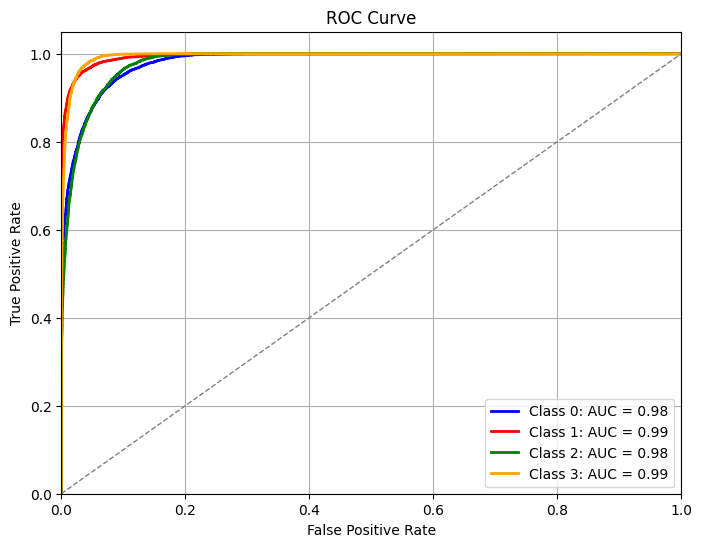

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


# Convert target labels to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2, 3])

# Create DMatrix for test data
dtest = xgb.DMatrix(X_test)

# Make predictions
y_pred_prob = xgb_model.predict(dtest)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test_one_hot[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']
for i in range(len(y_test_one_hot[0])):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
print(test_pre)

[2 3 3 ... 3 1 1]


<ipython-input-84-67aed2cd935c>:38: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
<ipython-input-84-67aed2cd935c>:39: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
<ipython-input-84-67aed2cd935c>:40: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
<ipython-input-84-67aed2cd935c>:41: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
<ipython-input-84-67aed2cd935c>:42: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
<ipython-input-84-67aed2cd935c>:43: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis i

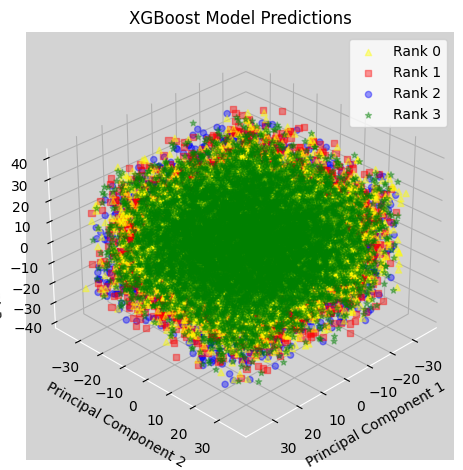

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import xgboost as xgb


dtest = xgb.DMatrix(X_test)

y_pred_prob = xgb_model.predict(dtest)
predicted_classes = np.argmax(y_pred_prob, axis=1)

pca = PCA(n_components=3)
features_pca = pca.fit_transform(X)

colors = ['yellow', 'red', 'blue', 'green']
markers = ['^', 's', 'o', '*']
class_labels = [0, 1, 2, 3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(class_labels):
    class_indices = np.where(predicted_classes == label)[0]
    ax.scatter(features_pca[class_indices, 0], features_pca[class_indices, 1], features_pca[class_indices, 2],
               c=colors[i], marker=markers[i], label=f'Rank {label}',alpha=0.4)

ax.set_facecolor('lightgray')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_xaxis.line.set_color("white")
ax.w_yaxis.line.set_color("white")
ax.w_zaxis.line.set_color("white")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.legend()

plt.title('XGBoost Model Predictions')
plt.tight_layout()
ax.view_init(elev=30,azim=45)

plt.show()

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=1da95d5f589caff7b2ef22e55212d973fb3743f494ce86ba4243a2f225affb07
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=6adc6394bcd7144f18983cda9673e35520ea7285c18dbcb1c0e4e69c0b9a7796
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import matplotlib.pyplot as plt

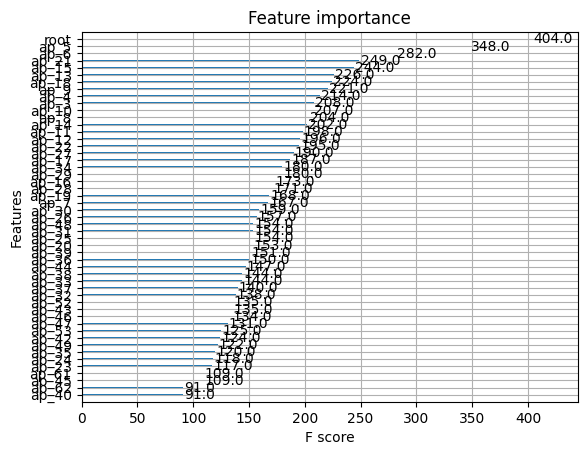

In [ ]:
xgb.plot_importance(xgb_model)
plt.show()

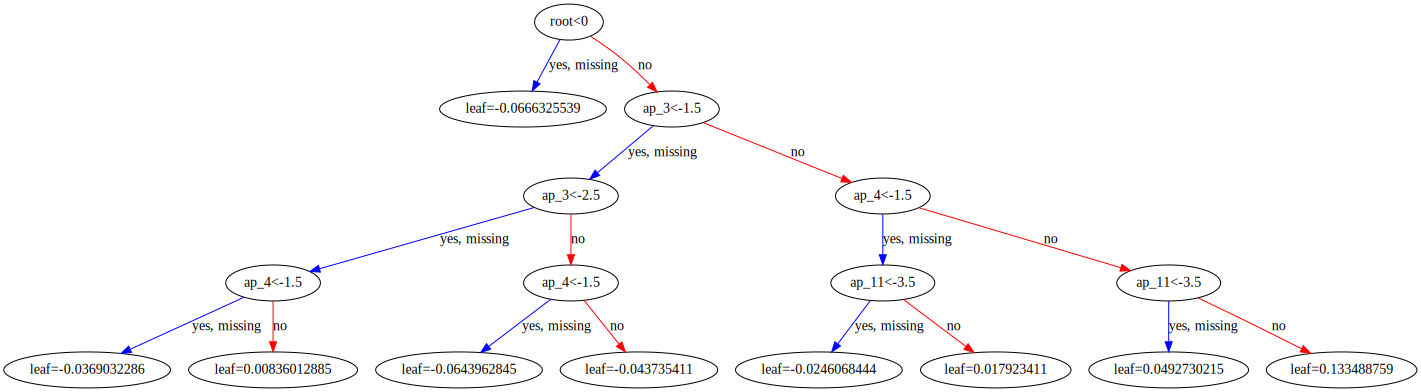

In [ ]:
import graphviz
xgb.to_graphviz(xgb_model)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train)


params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.6,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.5,
    'reg_lambda': 0.5,
    'random_state': 42
}

cv_results = xgb.cv(params, dtrain, num_boost_round=200, nfold=5, early_stopping_rounds=10, verbose_eval=False)

In [ ]:
print(cv_results.keys())

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'test-mlogloss-mean',
       'test-mlogloss-std'],
      dtype='object')


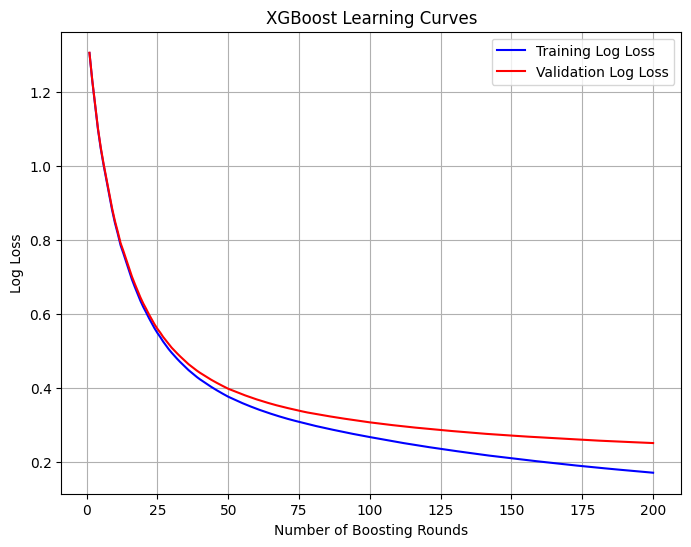

In [ ]:
train_logloss = cv_results['train-mlogloss-mean']
val_logloss = cv_results['test-mlogloss-mean']

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_logloss) + 1), train_logloss, label='Training Log Loss', color='blue')
plt.plot(range(1, len(val_logloss) + 1), val_logloss, label='Validation Log Loss', color='red')

plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()